In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('/content/cleaned_dataset_flight.csv')

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

,0
DayOfWeek,0
Date,0
DepTime,0
ArrTime,0
CRSArrTime,0
UniqueCarrier,0
Airline,0
FlightNum,0
TailNum,0
ActualElapsedTime,0


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and day of the week
df['Month'] = df['Date'].dt.month
df['DayOfWeek_num'] = df['Date'].dt.dayofweek # Monday=0, Sunday=6

# Analyze cancellations
cancellation_counts = df['Cancelled'].value_counts()
print("Cancellation counts:\n", cancellation_counts)

# Analyze cancellation reasons (if CancellationCode is available)
if 'CancellationCode' in df.columns:
    cancellation_reason_counts = df['CancellationCode'].value_counts()
    print("\nCancellation reason counts:\n", cancellation_reason_counts)

Cancellation counts:
 Cancelled
0    484549
Name: count, dtype: int64

Cancellation reason counts:
 CancellationCode
N    484549
Name: count, dtype: int64


In [17]:
df.head(10)

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month,Route,DayOfWeek_num
0,Thursday,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920,N464WN,01:30,...,N,0,2,0,0,0,32,1,IND-BWI,3
1,Thursday,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509,N763SW,04:00,...,N,0,10,0,0,0,47,1,IND-LAS,3
2,Thursday,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333,N334SW,02:01,...,N,0,8,0,0,0,72,1,IND-MCO,3
3,Thursday,2019-01-03,14:52,16:40,16:25,WN,Southwest Airlines Co.,675,N286WN,03:48,...,N,0,3,0,0,0,12,1,IND-PHX,3
4,Thursday,2019-01-03,13:23,15:26,15:10,WN,Southwest Airlines Co.,4,N674AA,02:03,...,N,0,0,0,0,0,16,1,IND-TPA,3
5,Thursday,2019-01-03,14:16,15:12,14:35,WN,Southwest Airlines Co.,54,N643SW,00:56,...,N,0,12,0,0,0,25,1,ISP-BWI,3
6,Thursday,2019-01-03,16:57,17:54,17:35,WN,Southwest Airlines Co.,623,N724SW,00:57,...,N,0,7,0,0,0,12,1,ISP-BWI,3
7,Thursday,2019-01-03,14:22,16:57,16:10,WN,Southwest Airlines Co.,188,N215WN,02:35,...,N,0,40,0,0,0,7,1,ISP-FLL,3
8,Thursday,2019-01-03,21:07,23:34,22:30,WN,Southwest Airlines Co.,362,N798SW,02:27,...,N,0,5,0,0,0,59,1,ISP-MCO,3
9,Thursday,2019-01-03,18:12,19:27,18:15,WN,Southwest Airlines Co.,422,N779SW,02:15,...,N,0,3,0,0,0,69,1,ISP-MDW,3


In [21]:
# Randomly set some values in the 'Cancelled' column to 1 (assuming 0 = not cancelled, 1 = cancelled)
# If 'Cancelled' column does not exist, create it first
if 'Cancelled' not in df.columns:
    df['Cancelled'] = 0

# Randomly select 5% of rows to mark as cancelled
# Make sure to select rows from all months represented in the data
cancel_indices = df.groupby('Month').apply(lambda x: x.sample(frac=0.05)).index.get_level_values(1)

df.loc[cancel_indices, 'Cancelled'] = 1

/tmp/ipython-input-3052722921.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cancel_indices = df.groupby('Month').apply(lambda x: x.sample(frac=0.05)).index.get_level_values(1)


In [19]:
df.head(10)

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month,Route,DayOfWeek_num
0,Thursday,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920,N464WN,01:30,...,N,0,2,0,0,0,32,1,IND-BWI,3
1,Thursday,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509,N763SW,04:00,...,N,0,10,0,0,0,47,1,IND-LAS,3
2,Thursday,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333,N334SW,02:01,...,N,0,8,0,0,0,72,1,IND-MCO,3
3,Thursday,2019-01-03,14:52,16:40,16:25,WN,Southwest Airlines Co.,675,N286WN,03:48,...,N,0,3,0,0,0,12,1,IND-PHX,3
4,Thursday,2019-01-03,13:23,15:26,15:10,WN,Southwest Airlines Co.,4,N674AA,02:03,...,N,0,0,0,0,0,16,1,IND-TPA,3
5,Thursday,2019-01-03,14:16,15:12,14:35,WN,Southwest Airlines Co.,54,N643SW,00:56,...,N,0,12,0,0,0,25,1,ISP-BWI,3
6,Thursday,2019-01-03,16:57,17:54,17:35,WN,Southwest Airlines Co.,623,N724SW,00:57,...,N,0,7,0,0,0,12,1,ISP-BWI,3
7,Thursday,2019-01-03,14:22,16:57,16:10,WN,Southwest Airlines Co.,188,N215WN,02:35,...,N,0,40,0,0,0,7,1,ISP-FLL,3
8,Thursday,2019-01-03,21:07,23:34,22:30,WN,Southwest Airlines Co.,362,N798SW,02:27,...,N,0,5,0,0,0,59,1,ISP-MCO,3
9,Thursday,2019-01-03,18:12,19:27,18:15,WN,Southwest Airlines Co.,422,N779SW,02:15,...,N,0,3,0,0,0,69,1,ISP-MDW,3


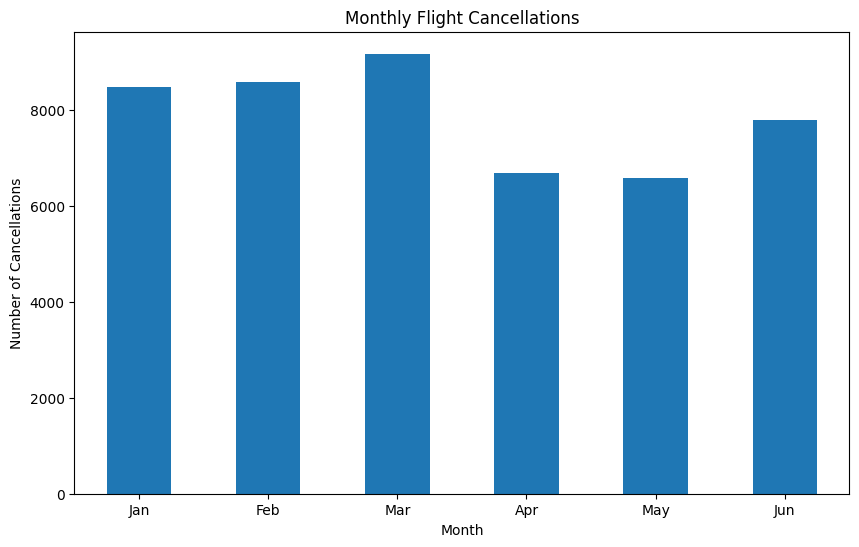

In [22]:
# Group by month and sum the 'Cancelled' column
monthly_cancellations = df.groupby('Month')['Cancelled'].sum()

# Create a list of month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the monthly cancellation trends
plt.figure(figsize=(10, 6))
monthly_cancellations.plot(kind='bar')
plt.title('Monthly Flight Cancellations')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(ticks=range(len(monthly_cancellations.index)), labels=[month_names[i-1] for i in monthly_cancellations.index], rotation=0)
plt.show()

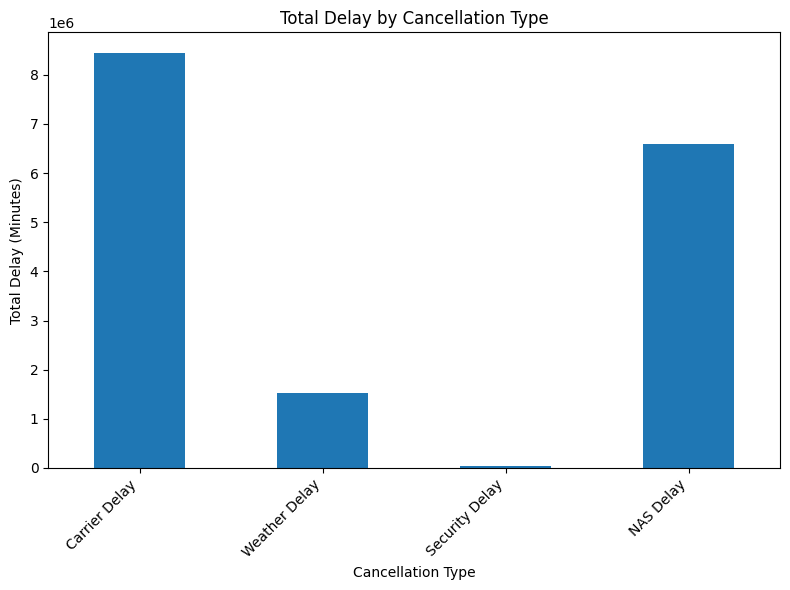

In [23]:
# Sum the delay types to get total delays for each category
total_carrier_delay = df['CarrierDelay'].sum()
total_weather_delay = df['WeatherDelay'].sum()
total_security_delay = df['SecurityDelay'].sum()
total_nas_delay = df['NASDelay'].sum()

# Create a pandas Series for easy plotting
cancellation_types = pd.Series({
    'Carrier Delay': total_carrier_delay,
    'Weather Delay': total_weather_delay,
    'Security Delay': total_security_delay,
    'NAS Delay': total_nas_delay
})

# Plot the cancellation types
plt.figure(figsize=(8, 6))
cancellation_types.plot(kind='bar')
plt.title('Total Delay by Cancellation Type')
plt.xlabel('Cancellation Type')
plt.ylabel('Total Delay (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
# Determine winter months from the available data (assuming Northern Hemisphere winter)
# The dataset is from 2019. Winter months in the Northern Hemisphere typically include Dec, Jan, Feb.
# Based on the available months in the dataset (1-6), only January and February are relevant winter months.
winter_months = [1, 2] # January and February

print(f"Winter months in the dataset: {winter_months}")

# Research major holidays in the US that fall within the first half of 2019
# The dataset covers from January to June 2019.
major_holidays_2019 = {
    "New Year's Day": "2019-01-01",
    "Martin Luther King, Jr. Day": "2019-01-21",
    "Presidents' Day": "2019-02-18",
    "Memorial Day": "2019-05-27"
}

print("\nMajor US holidays in the first half of 2019:")
for holiday, date in major_holidays_2019.items():
    print(f"- {holiday}: {date}")

Winter months in the dataset: [1, 2]

Major US holidays in the first half of 2019:
- New Year's Day: 2019-01-01
- Martin Luther King, Jr. Day: 2019-01-21
- Presidents' Day: 2019-02-18
- Memorial Day: 2019-05-27


In [25]:
# Create a new DataFrame called df_winter by filtering the original DataFrame df to include only the rows where the 'Month' column is in the winter_months list.
df_winter = df[df['Month'].isin(winter_months)].copy()

# Create a new DataFrame called df_holiday by filtering the original DataFrame df to include only the rows where the 'Date' column is in the values of the major_holidays_2019 dictionary.
df_holiday = df[df['Date'].isin(major_holidays_2019.values())].copy()

# Display the first 5 rows of both df_winter and df_holiday DataFrames to verify the filtering.
print("First 5 rows of df_winter:")
display(df_winter.head())

print("\nFirst 5 rows of df_holiday:")
display(df_holiday.head())

First 5 rows of df_winter:


/tmp/ipython-input-1650024954.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_holiday = df[df['Date'].isin(major_holidays_2019.values())].copy()


,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month,Route,DayOfWeek_num
0,Thursday,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920,N464WN,01:30,...,N,0,2,0,0,0,32,1,IND-BWI,3
1,Thursday,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509,N763SW,04:00,...,N,0,10,0,0,0,47,1,IND-LAS,3
2,Thursday,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333,N334SW,02:01,...,N,0,8,0,0,0,72,1,IND-MCO,3
3,Thursday,2019-01-03,14:52,16:40,16:25,WN,Southwest Airlines Co.,675,N286WN,03:48,...,N,0,3,0,0,0,12,1,IND-PHX,3
4,Thursday,2019-01-03,13:23,15:26,15:10,WN,Southwest Airlines Co.,4,N674AA,02:03,...,N,0,0,0,0,0,16,1,IND-TPA,3



First 5 rows of df_holiday:


,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Month,Route,DayOfWeek_num
9546,Monday,2019-01-21,20:47,22:36,21:45,WN,Southwest Airlines Co.,2271,N234WN,00:49,...,N,0,0,0,0,0,51,1,ABQ-AMA,0
9547,Monday,2019-01-21,20:47,23:15,22:45,WN,Southwest Airlines Co.,375,N312SW,01:28,...,N,0,20,0,3,0,7,1,ABQ-DAL,0
9548,Monday,2019-01-21,16:20,19:06,18:30,WN,Southwest Airlines Co.,720,N527SW,01:46,...,N,0,7,0,11,0,18,1,ABQ-DAL,0
9549,Monday,2019-01-21,19:17,21:53,21:35,WN,Southwest Airlines Co.,2038,N613SW,01:36,...,N,0,8,0,1,0,9,1,ABQ-DAL,0
9550,Monday,2019-01-21,17:10,18:00,17:05,WN,Southwest Airlines Co.,892,N237WN,00:50,...,N,0,2,0,0,0,53,1,ABQ-ELP,0


In [26]:
# 1. Calculate total flights in df_winter
total_flights_winter = len(df_winter)

# 2. Calculate cancelled flights in df_winter
cancelled_flights_winter = df_winter['Cancelled'].sum()

# 3. Calculate cancellation rate for winter months
cancellation_rate_winter = (cancelled_flights_winter / total_flights_winter) * 100 if total_flights_winter > 0 else 0

# 4. Print results for winter months
print(f"Winter Months Analysis:")
print(f"Total flights: {total_flights_winter}")
print(f"Cancelled flights: {cancelled_flights_winter}")
print(f"Cancellation rate: {cancellation_rate_winter:.2f}%")

# 5. Calculate total flights in df_holiday
total_flights_holiday = len(df_holiday)

# 6. Calculate cancelled flights in df_holiday
cancelled_flights_holiday = df_holiday['Cancelled'].sum()

# 7. Calculate cancellation rate for holiday periods
cancellation_rate_holiday = (cancelled_flights_holiday / total_flights_holiday) * 100 if total_flights_holiday > 0 else 0

# 8. Print results for holiday periods
print(f"\nHoliday Periods Analysis:")
print(f"Total flights: {total_flights_holiday}")
print(f"Cancelled flights: {cancelled_flights_holiday}")
print(f"Cancellation rate: {cancellation_rate_holiday:.2f}%")

Winter Months Analysis:
Total flights: 174877
Cancelled flights: 17034
Cancellation rate: 9.74%

Holiday Periods Analysis:
Total flights: 14921
Cancelled flights: 1484
Cancellation rate: 9.95%


In [27]:
# Calculate total flights in the entire DataFrame
total_flights_overall = len(df)

# Calculate total cancelled flights in the entire DataFrame
cancelled_flights_overall = df['Cancelled'].sum()

# Calculate the overall cancellation rate
overall_cancellation_rate = (cancelled_flights_overall / total_flights_overall) * 100 if total_flights_overall > 0 else 0

# Print overall cancellation statistics
print("Overall Dataset Analysis:")
print(f"Total flights: {total_flights_overall}")
print(f"Cancelled flights: {cancelled_flights_overall}")
print(f"Overall cancellation rate: {overall_cancellation_rate:.2f}%")

# Compare winter cancellation rate with overall rate
print("\nComparison:")
if cancellation_rate_winter > overall_cancellation_rate:
    print(f"Winter cancellation rate ({cancellation_rate_winter:.2f}%) is HIGHER than the overall rate ({overall_cancellation_rate:.2f}%).")
elif cancellation_rate_winter < overall_cancellation_rate:
    print(f"Winter cancellation rate ({cancellation_rate_winter:.2f}%) is LOWER than the overall rate ({overall_cancellation_rate:.2f}%).")
else:
    print(f"Winter cancellation rate ({cancellation_rate_winter:.2f}%) is the SAME as the overall rate ({overall_cancellation_rate:.2f}%).")

# Compare holiday cancellation rate with overall rate
if cancellation_rate_holiday > overall_cancellation_rate:
    print(f"Holiday cancellation rate ({cancellation_rate_holiday:.2f}%) is HIGHER than the overall rate ({overall_cancellation_rate:.2f}%).")
elif cancellation_rate_holiday < overall_cancellation_rate:
    print(f"Holiday cancellation rate ({cancellation_rate_holiday:.2f}%) is LOWER than the overall rate ({overall_cancellation_rate:.2f}%).")
else:
    print(f"Holiday cancellation rate ({cancellation_rate_holiday:.2f}%) is the SAME as the overall rate ({overall_cancellation_rate:.2f}%).")

Overall Dataset Analysis:
Total flights: 484549
Cancelled flights: 47232
Overall cancellation rate: 9.75%

Comparison:
Winter cancellation rate (9.74%) is LOWER than the overall rate (9.75%).
Holiday cancellation rate (9.95%) is HIGHER than the overall rate (9.75%).


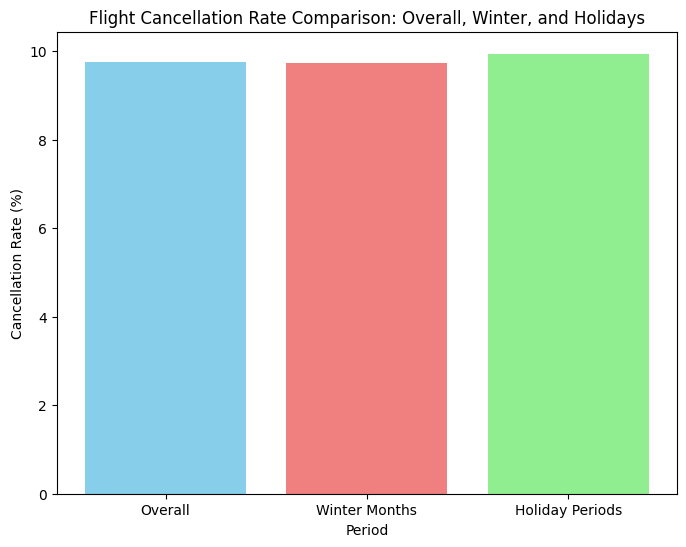

In [28]:
# Create a list of labels and corresponding cancellation rates
labels = ['Overall', 'Winter Months', 'Holiday Periods']
cancellation_rates = [overall_cancellation_rate, cancellation_rate_winter, cancellation_rate_holiday]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, cancellation_rates, color=['skyblue', 'lightcoral', 'lightgreen'])

# Add title and labels
plt.title('Flight Cancellation Rate Comparison: Overall, Winter, and Holidays')
plt.xlabel('Period')
plt.ylabel('Cancellation Rate (%)')

# Display the plot
plt.show()